In [1]:
# Import necessary packages
import numpy as np # Numerical computation package
import pandas as pd # Dataframe package
import matplotlib.pyplot as plt # Plotting package
np.random.seed(1) # Set the random seed for reproduceability

In [2]:
ped = pd.read_csv("data_clean_with_dummies.csv")
ped = ped.set_index('date')

ped = ped.drop(["time", "Unnamed: 0"], axis = 1)

#Features of our dataset only temperature, so the rest remains as 0 or 1
standardize = lambda x: (x - x.mean()) / x.std()

# Define our features and labels (⚠️ notice the double bracket for features ⚠️)
X, y = ped[ped.columns[1:]], ped["pedestrians count"]

X

,temperature in ºc,holiday,school holiday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,8.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,7.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,7.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,7.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,6.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,11.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-01-31,11.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-31,10.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# cikit-learn provides a nice functionality to compute polynomial of our features
from sklearn.preprocessing import PolynomialFeatures
#Different Degrees of polynomials, without the constant
poly2 = PolynomialFeatures(2, include_bias=False)
poly3 = PolynomialFeatures(3, include_bias=False)

#sklearn provides a nifty function to split train/test sets
from sklearn.model_selection import train_test_split

#Splitting the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

In [4]:
# # Set up the canvas
# fig, ax = plt.subplots(figsize=(12, 8))
# # Add scatterplot
# ax.scatter(df["temperature in ºc"], df["pedestrians count"])
# # Label axes
# ax.set_xlabel("Temperature")
# ax.set_ylabel("Pedestrian count")
# # Add a grid
# ax.grid(True)

In [5]:
#Define a new Xtrain and Xtest with the squared feature
X2train = poly2.fit_transform(Xtrain)
X2test = poly2.fit_transform(Xtest)


#Define a new Xtrain and Xtest with the higher-order polynomial features

Xtrain_s = standardize(Xtrain)
X3train = poly3.fit_transform(Xtrain_s)
X3train = np.apply_along_axis(standardize, 0, X3train)
Xtest_s = standardize(Xtest)
X3test = poly3.fit_transform(Xtest_s)
X3test = np.apply_along_axis(standardize, 0, X3test)

In [6]:
Xtrain["school holiday"] = Xtrain["school holiday"].astype(int)
Xtrain["school holiday"] = np.int64(Xtrain["school holiday"])

Xtrain["school holiday"].max()

#standardize(Xtrain)


1

In [7]:
Xtest.shape # Display the size of the test set

(4608, 54)

In [8]:
from sklearn.linear_model import LinearRegression # OLS

# Define the estimator
ols1_t = LinearRegression() 
# Fit the estimator (⚠️ notice the fit on the train data only ⚠️)
ols1_t.fit(Xtrain, ytrain)

LinearRegression()

In [9]:
# Define the estimator
ols2_t = LinearRegression() 
# Fit the estimator (⚠️ notice the fit on the train data only ⚠️)
ols2_t.fit(X2train, ytrain)

LinearRegression()

In [10]:
# Define the estimator
ols3_t = LinearRegression() 
# Fit the estimator (⚠️ notice the fit on the train data only ⚠️)
ols3_t.fit(X3train, ytrain)

LinearRegression()

In [11]:
# Define some lists to help us compute the metrics
model_list = [ols1_t, ols2_t, ols3_t]
Xtrain_list = [Xtrain, X2train, X3train]
ytrain_list = [ytrain for _ in range(3)] #range(3)
Xtest_list = [Xtest, X2test, X3test]
ytest_list = [ytest for _ in range(3)] #range(3)

# # In case you are confused by the lilst comprehensions
# print("ytrain:", ytrain)
# print("\n\n List comprehension:\n\n", [ytrain for _ in range(3)])

In [12]:
# Helpers to compute MSE, MAE, R2
compute_mse = lambda m, X, y: np.mean((m.predict(X) - y) ** 2)
compute_mae = lambda m, X, y: np.mean(np.abs(m.predict(X) - y))
compute_r2  = lambda m, X, y: m.score(X, y)

In [13]:
# Compute the metrics into lists for plotting
# OLS with single feature
ols1_results = {
    "train": [f(ols1_t, Xtrain, ytrain) for f in [compute_mse, compute_mae, compute_r2]],
    "test": [f(ols1_t, Xtest, ytest) for f in [compute_mse, compute_mae, compute_r2]]
}
# OLS with 2 features
ols2_results = {
    "train": [f(ols2_t, X2train, ytrain) for f in [compute_mse, compute_mae, compute_r2]],
    "test": [f(ols2_t, X2test, ytest) for f in [compute_mse, compute_mae, compute_r2]]
}
# OLS with multiple features
ols3_results = {
    "train": [f(ols3_t, X3train, ytrain) for f in [compute_mse, compute_mae, compute_r2]],
    "test": [f(ols3_t, X3test, ytest) for f in [compute_mse, compute_mae, compute_r2]]
}

# OK, this list comprehensions may feel a little dense, but you see that they are very elegant and practical. Do you understand them?
# Here is their output:

print("ols1: ", ols1_results)
print("\nols2: ", ols2_results)
print("\nols3: ", ols3_results)

ols1:  {'train': [2278497.468980741, 1001.3005290697674, 0.7842132502655541], 'test': [2255086.417620341, 1005.3389350043403, 0.7879668194865777]}

ols2:  {'train': [635415.8886066439, 449.96956885901164, 0.9398224789806816], 'test': [9.105294706525262e+18, 53554329.5904149, -856120005445.9989]}

ols3:  {'train': [274784.6909355686, 270.29445713300584, 0.973976317226152], 'test': [1.0438362804632653e+29, 193309092837423.88, -9.814609531260497e+21]}


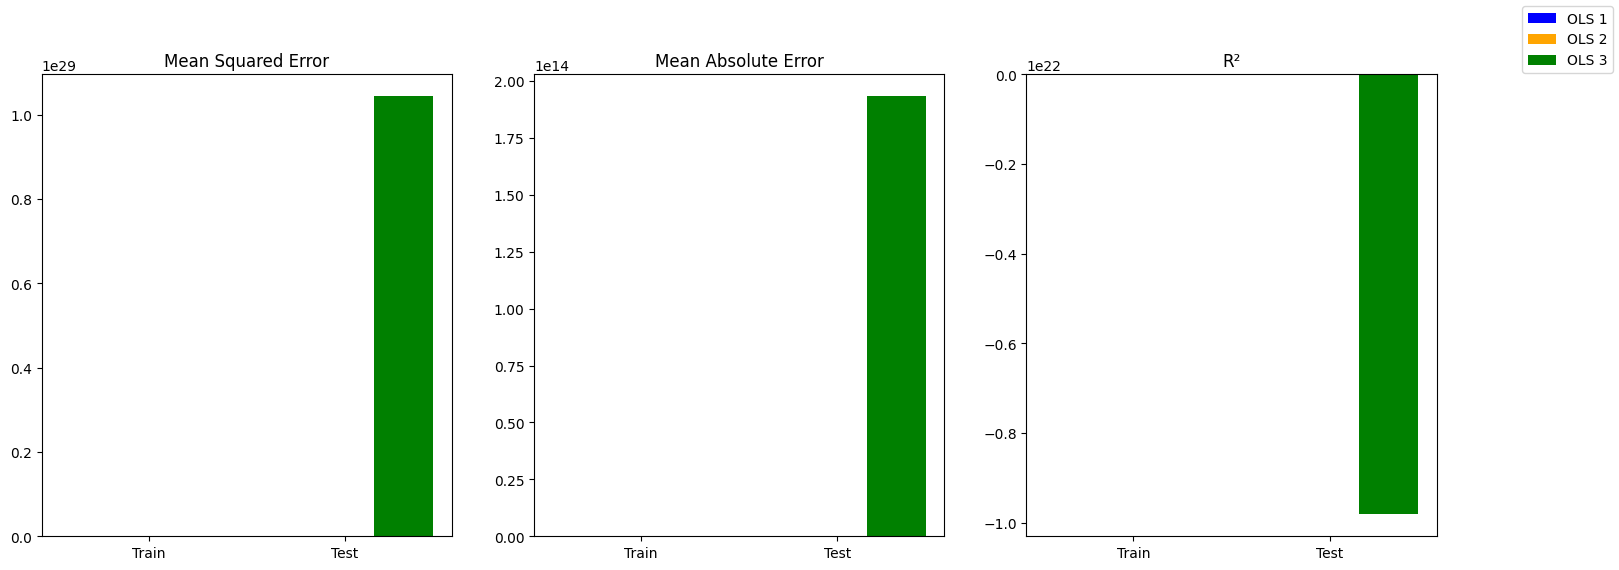

In [14]:
# Now we present these results as plots (🙀 🤯 this code is quite complicated, no need to focus on it for now)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
width = .3 # Bar width
for i in range(3):
    labs = [f"OLS {i}" for i in range(1, 4)] if i == 0 else ["" for _ in range(1, 4)]
    axs[i].bar(0, ols1_results["train"][i], width, label=labs[0], color="blue")
    axs[i].bar(0 + width, ols2_results["train"][i], width, label=labs[1], color="orange")
    axs[i].bar(0 + 2 * width, ols3_results["train"][i], width, label=labs[2], color="green")
    axs[i].bar(1, ols1_results["test"][i], width, color="blue")
    axs[i].bar(1 + width, ols2_results["test"][i], width, color="orange")
    axs[i].bar(1 + 2 * width, ols3_results["test"][i], width, color="green")
# Plot titles
axs[0].set_title("Mean Squared Error")
axs[1].set_title("Mean Absolute Error")
axs[2].set_title("R²")
# Labels and legend
for ax in axs:
    ax.set_xticks([width, width + 1], ["Train", "Test"])
fig.legend()

In [15]:
from sklearn.model_selection import cross_val_score # cross-validation function

In [16]:
# cv = 5, implies that we use 5 folds, the function will return 
# the negative mean absolute error for each fold, so we have to take its 
# negative value again to obtain the MAE
mae_cv = -cross_val_score(ols1_t, Xtrain, ytrain, cv=5, scoring="neg_mean_absolute_error") # cv is the argument how often the data is divided
print(f"Cross-validation mean absolute error: {np.mean(mae_cv):.2f} (± {np.std(mae_cv)/np.sqrt(5):.2f})")

Cross-validation mean absolute error: 1007.87 (± 10.44)


In [17]:
# Create lists to keep track of the results
mae_mean_list = []
mae_se_list = []
# Instantiate a LinearRegression model
ols_cv = LinearRegression()
# Loop over the polynomials
for p in range(1, 10):
    
    # Compute polynomials
    poly = PolynomialFeatures(p, include_bias=False)
    X_cv = poly.fit_transform(Xtrain_s)
    X_cv = np.apply_along_axis(standardize,0, X_cv)
    
    # Run cross-validation
    mae_cv = -cross_val_score(ols_cv, X_cv, ytrain, cv=5, scoring="neg_mean_absolute_error") # Data scientist call it false???
    
    # Store the mean and s.e. of the 5-folds
    mae_mean_list.append(np.mean(mae_cv))
    mae_se_list.append(np.std(mae_cv) / np.sqrt(5))

KeyboardInterrupt: 